This Notebook is an adaptation of the [tutorial](https://github.com/cltl/ba-text-mining/blob/master/lab_sessions/lab6/Lab6.2-Topic-modeling-gensim.ipynb) generated from Piek Vossen.

## **What is Topic Modeling?**
*The following image was sourced from [Blei, 2021](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=8OYE6iEAAAAJ&citation_for_view=8OYE6iEAAAAJ:OBSaB-F7qqsC)*

Imagine entering a bookstore to buy a cooking book and being unable to locate the part of the store where the book is located, presuming the bookstore has just placed all types of books together. In this case, the importance of dividing the bookstore into distinct sections based on the type of book becomes apparent. Topic Modeling is a process of detecting themes in a text corpus, similar to splitting a bookshop depending on the content of the books. The main idea behind this task is to produce a concise summary highlighting the most common topics from a corpus of thousands of documents.

*This example was inspired by the following [blog](https://www.analyticsvidhya.com/blog/2021/07/topic-modelling-with-lda-a-hands-on-introduction/)*
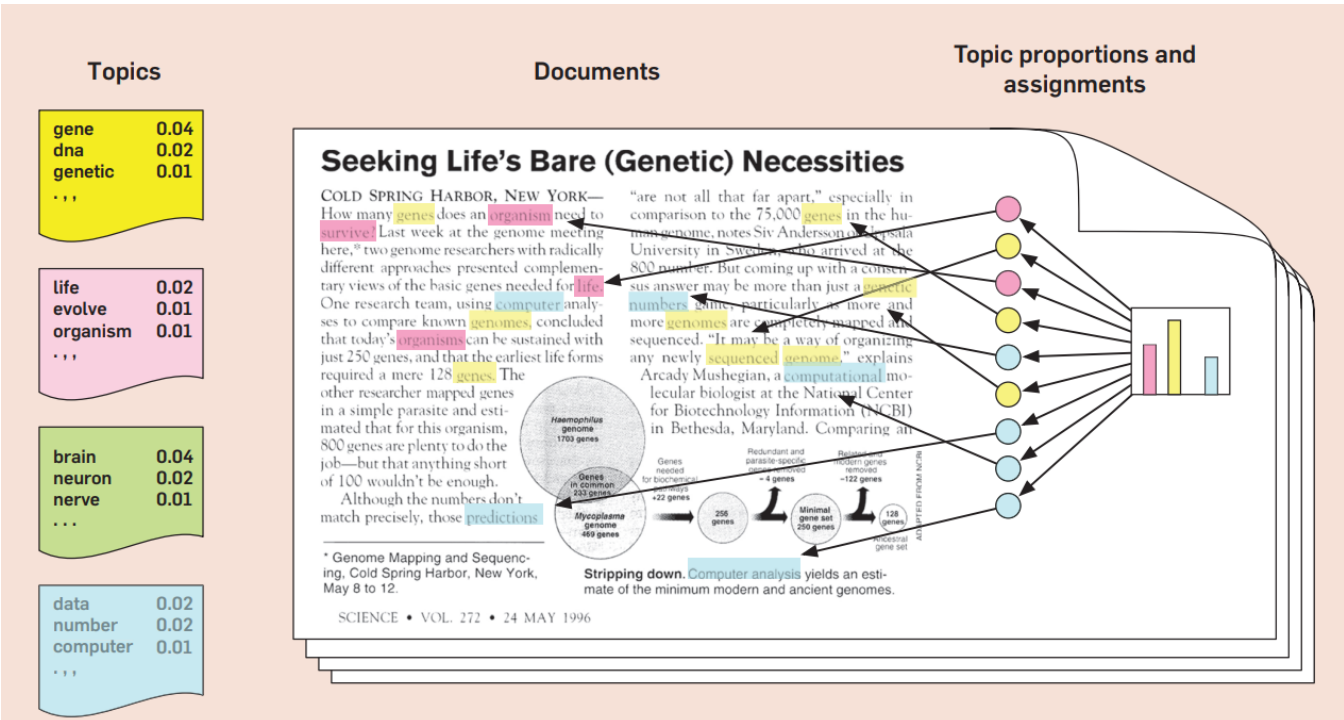

This model takes a set of documents as input and generates a set of topics that accurately and cherently describe the content of the documents. It is one of the most commonly used approaches for processing unstructured textual data, this type of data contains information not organized in a pre-determined way. 


## **What does Latent LDA stand for?**


*  **Latent:** represents  the process of the model to discover the hidden topics within the documents

*  **Dirichlet** indicates the distribution of subjects in a document and the distribution of words within topics

*  **Allocation** represents the distribution of topics in the document

## **How does LDA work?**
*Images used for the following part are retrieved from ([Seth, 2021](https://www.analyticsvidhya.com/blog/2021/06/part-2-topic-modeling-and-latent-dirichlet-allocation-lda-using-gensim-and-sklearn/))*

This method is a three-level hierarchical generative model, it is a powerful textual analysis technique based on computational linguistics research that uses statistical correlations between words in a large number of documents to find and quantify the underlying subjects ([Jelodar et al.,2019](https://arxiv.org/abs/1711.04305)).This topic modeling algorithm categorizes the words within a document based on two assumptions: documents are a mixture of topics and topics are a mixture of words. In other words, ‘the documents are known as the probability density (or distribution) of topics, and the topics are the probability density (or distribution) of words’ ([Seth, 2021](https://www.analyticsvidhya.com/blog/2021/06/part-2-topic-modeling-and-latent-dirichlet-allocation-lda-using-gensim-and-sklearn/)). The hidden topics are a 'recurring pattern of co-occuring words' and therefore this method relies on the bag-of-words (BOW) approach.This approach combines all words into a bag without taking into consideration the deeper semantic understanding or the order of tokens within the document. For example, for the sentence ‘The man became the king of England’, the representation of a bag of words will not be able to identify that the word ‘man’ and ‘king’ are related. 

LDA converts documents into document word/dovument term martix (DTM). This is a statistical representation describing the frequency of terms that occur within a collection of documents. DTM gets separated into two sub-matrices: the document-term matrix: which contains the possible topics, and the topic-word matrix: which includes the words that the potential topics contain ([Seth,2021](https://www.analyticsvidhya.com/blog/2021/06/part-2-topic-modeling-and-latent-dirichlet-allocation-lda-using-gensim-and-sklearn/)).

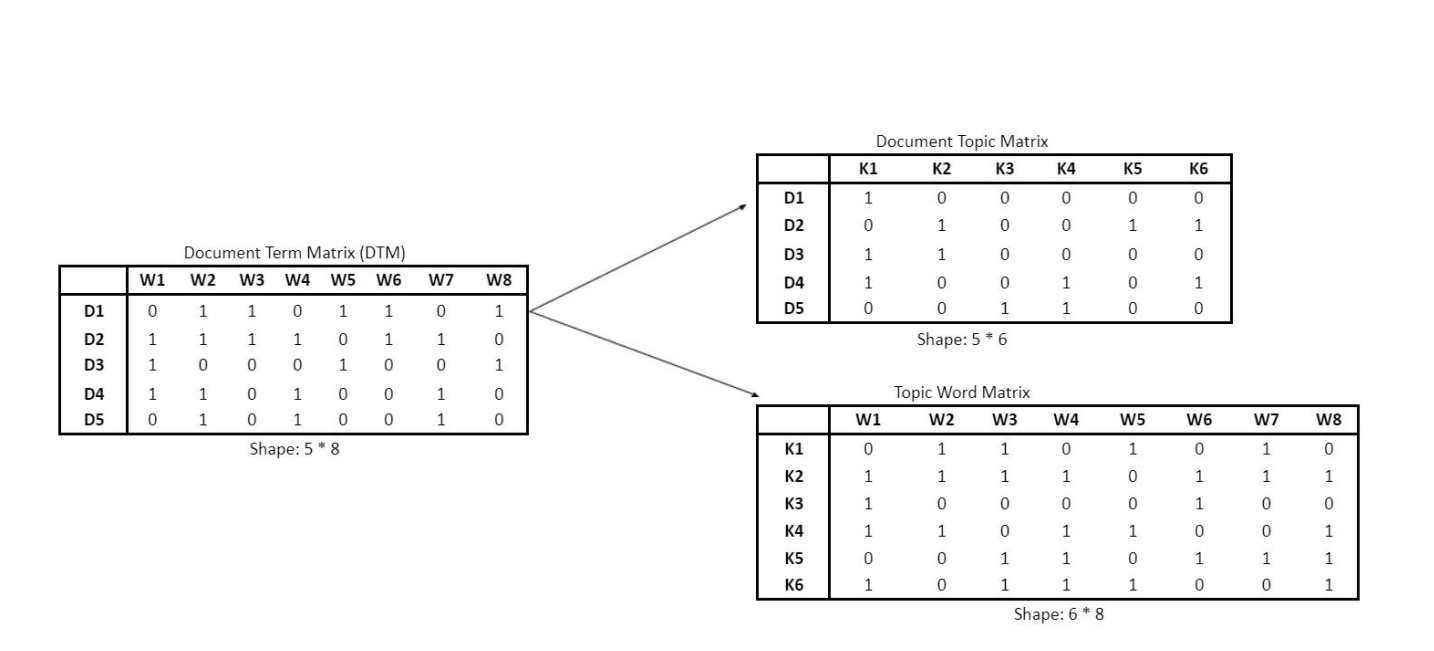

These matrices already provide topic-word and document topic distributions. However, the fundamental goal of this model is to improve the distribution of this data.To improve these matrices, LDA employs sampling techniques.It goes through each
word ‘w’ for document ‘d’ and tries to replace the present topic assignment with a new one. With a probability P that is the product of two probabilities p1 and p2, a
new topic ‘k’ is assigned to the word ‘w’. After the data is represented based on the
matrices, the words are transformed into vectors.

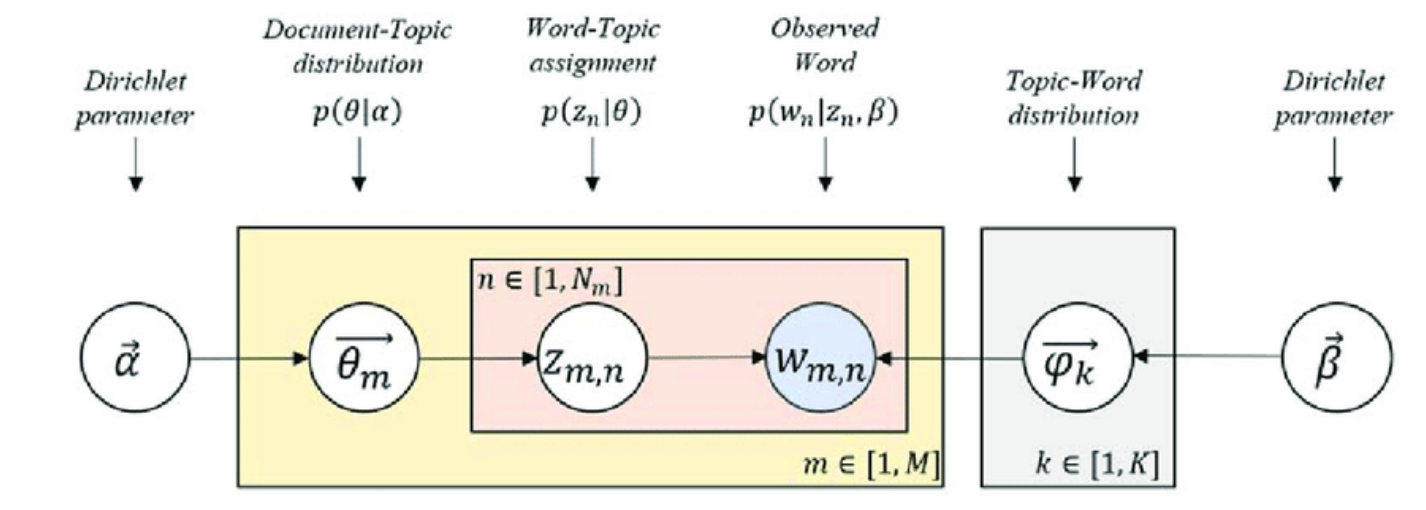



The yellow space represents all the documents (M), and the peach colour is the
number of words within a document (N). According to the vector space, each term is
associated with a hidden topic (Z); this topic is assigned to a number of topic words
based on word distribution. The main goal of LDA is to find the optimal representation
of the document-topic and topic-word distribution.














For a deeper understanding of the components with LDA a [blog](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158) written by Thushan Ganegedara offers a great explanation. 




# **Implementation**

Enough on the theoretical component, let's get our hands dirty! This notebook is implementing a traditional approach of topic modeling, Latent Dirichlet Allocation (LDA)[(Blei, Ng, and Jordan, 2003)](https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf). 

### **Step 0: Loading the the data and relevant packages**

The first step in order to start with the topic modeling task is to load the desired data as well as the relevant packages for the pre-processing steps. The [data](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) used for this notebook is a collection of approximately 20,000 newsgroup documents, partitioned evenly across 20 different newsgroups.

In [ ]:
#Importing all relevant packages
import gensim
import numpy as np
import pandas as pd
import nltk
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from sklearn.datasets import fetch_20newsgroups
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim.matutils import cossim
from nltk.stem.porter import *

In [ ]:
dataset = fetch_20newsgroups(subset='train')['data']

### **Step 1: Reviewing and preparing the data**

Text data is unstructured and if we want to extract information reading is not an option. You need to process those texts to obtain structured representations. 
The common idea for all NLP tools is that they try to transform text in some meaningful way. Before diving into the topic modeling task itself, we need to review and prepare the textual data. 


**1.1 Data Statistics**

By reviewing the format, lenght as well as the type of data, can  provide better understanding and useful information in terms of what kind pre-processing steps need to be implemented. The following cell provides some information concerning the data we are using. 

In [ ]:
print(len(dataset)) #the lenght of the data
print(type(dataset)) # the type of variable the data is stored in 
print(dataset[:1]) # the first instance of the content within the data

11314
<class 'list'>
["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"]


**1.2 Dataframe**

A DataFrame is a two dimensional data structure of a table with rows and columns. With the creation of a DataFrame from textual data it makes the inspection and understanding of the data easier. Moreover, this function can take on a lot of different structures as input.The package used to generate a dataframe is [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [ ]:
#Creating a dataframe from the data imported 
full_train = pd.DataFrame() 
full_train['text'] = dataset
full_train['text'] = full_train['text'].fillna('').astype(str) #removing any nan type objects
full_train.head()
documents = full_train
documents

text
0      From: lerxst@wam.umd.edu (where's my thing)\nS...
1      From: guykuo@carson.u.washington.edu (Guy Kuo)...
2      From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3      From: jgreen@amber (Joe Green)\nSubject: Re: W...
4      From: jcm@head-cfa.harvard.edu (Jonathan McDow...
...                                                  ...
11309  From: jim.zisfein@factory.com (Jim Zisfein) \n...
11310  From: ebodin@pearl.tufts.edu\nSubject: Screen ...
11311  From: westes@netcom.com (Will Estes)\nSubject:...
11312  From: steve@hcrlgw (Steven Collins)\nSubject: ...
11313  From: gunning@cco.caltech.edu (Kevin J. Gunnin...

[11314 rows x 1 columns]

**1.3 Pre-processing**                   

As it can be seen from the output of the previous cells the data is not ready for the topic modeling task. It contains many elements that create 'noise' in the data such as punctuation, content words, etc. The process of preparing textual data can be consuming as the input used for the model is crucial for the quality of a language model. Based on the data used in this notebook the following pre-processing steps are implemented:

**1.3.1 Tokenization:**
A token is the word or the punctuation mark as it appears in the sentence.Tokenization is the process of splitting the sentences into individual words/punctuation. This process is beneficial as it divides the text data into pieces and thus make it easier for a language model to distinguish.  

**1.3.2 Lemmatization**
A lemma is the root form of a token, for instance, the word ‘undivided’ within a sentence is a token and ‘divide’ would be the corresponding lemma. In this case we are lemmatizing to prevent redundant topics such as ‘books’ and ‘book’. 

**1.3.3 Filtering**
Removing words that do not contain any meaning such as: pronouns,determiners and conjuctions. This reduces the 'noise' within the data and helps the language model when training. 

In [ ]:
# Pre-processing steps 
def lemmatization(text):
    """ Lemmatizes the input text 
        Argument: text (this refers to the input file of the topic model)
    """
    lemmatizer = WordNetLemmatizer() #lemmatization
    return lemmatizer.lemmatize(text)
def process_data(text):
    """ Pre-processing the input text 
        Argument: text (this refers to the input file of the topic model)
    """
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3: #removing stopwords 
           # result.append(token)
            result.append(lemmatization(token))
    return result

In [ ]:
#If the following packages are not already downloaded, the following lines are needed 
#nltk.download('wordnet')  
#nltk.download('omw-1.4')
preprocessed_data = documents['text'].map(lemmatization)
preprocessed_data = documents['text'].map(process_data)

In [ ]:
print(preprocessed_data)

0        [lerxst, thing, subject, nntp, posting, host, ...
1        [guykuo, carson, washington, subject, clock, p...
2        [twillis, purdue, thomas, willis, subject, que...
3        [jgreen, amber, green, subject, weitek, organi...
4        [head, harvard, jonathan, mcdowell, subject, s...
                               ...                        
11309    [zisfein, factory, zisfein, subject, migraine,...
11310    [ebodin, pearl, tuft, subject, screen, death, ...
11311    [westes, netcom, estes, subject, mounting, coo...
11312    [steve, hcrlgw, steven, collins, subject, sphe...
11313    [gunning, caltech, kevin, gunning, subject, st...
Name: text, Length: 11314, dtype: object


The previous cell shows the pre-processed data, as it can be seen the overall image of the data is easier to understand. The processed data has been seperated into individual tokens and content words as well as punctuation have been removed. This data will be used as the input for the topic model. 

### **Step 2: Input preparation for topic model**

**2.1.Bag of Words (BoW)**

The first step for the input preparation is to create a dictionary containing the frequency count of the words that appear within the data. This approach counts how often each word appears in each cluster, residing the frequency of each word.

In [ ]:
dictionary = gensim.corpora.Dictionary(preprocessed_data)
count = 0
for w, n in dictionary.iteritems():
  print(w,n)
  count += 1
  if count >10:
      break

0 addition
1 body
2 bricklin
3 brought
4 bumper
5 called
6 college
7 door
8 early
9 engine
10 enlighten


**2.1 Filtering extremes**

With the help of the dictionary function we are able to filter out tokens that are present in less that 10 documents or in more than 0.5 documents. When those two conditions are met then the function returns the 100000 most frequent tokens. Depending on the task and preference the values of these parameters can be changed to the preferable values.

In [ ]:
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

**2.2 Vector represantation**

With the doc2bow function provided by gensim we can create a BoW vector represantation for the dataset. As it can be seen from the output of this function we can inspect the frequency of each individual token within the document.

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_data]
example = bow_corpus[90]

for w in range(len(example)):
  print("Word {} (\"{}\") appears {} time.".format(example[w][0], 
                                               dictionary[example[w][0]], 
example[w][1]))

Word 13 ("know") appears 1 time.
Word 16 ("looking") appears 1 time.
Word 30 ("thanks") appears 1 time.
Word 32 ("university") appears 1 time.
Word 98 ("email") appears 2 time.
Word 167 ("chip") appears 1 time.
Word 178 ("information") appears 1 time.
Word 282 ("idea") appears 1 time.
Word 296 ("million") appears 1 time.
Word 374 ("available") appears 1 time.
Word 413 ("psuvm") appears 1 time.
Word 428 ("state") appears 1 time.
Word 443 ("help") appears 2 time.
Word 477 ("related") appears 1 time.
Word 488 ("work") appears 1 time.
Word 643 ("alot") appears 1 time.
Word 1020 ("important") appears 1 time.
Word 1315 ("worked") appears 1 time.
Word 1387 ("game") appears 1 time.
Word 1795 ("willing") appears 1 time.
Word 3112 ("peter") appears 1 time.
Word 3439 ("atari") appears 4 time.
Word 3440 ("out") appears 1 time.
Word 3441 ("penn") appears 1 time.
Word 3442 ("processor") appears 2 time.
Word 3443 ("schematic") appears 1 time.


### **Step 3: Parameters and training the model**

This topic modeling approach can be implemented in various ways, but the model’s performance comes down to estimating one or more parameters. In this case the most crucial parameter is **Number of topics**. Depending on the data as well as the goal of the task a grid search can be executed in order to find the optimal parameters. A grid search is a tool used for exhaustively searching the hyperparameter space given in an algorithm by trying different values and then picking the value with the best score.

#### **Parameters for this implementation**

    1.bow_corpus = Corpus data as BoW
    2.id2word = Mapping from word IDs to words. It is used to determine the vocabulary size, as well as for debugging and topic printing.
    3.passes = Number of full passes over the training corpus.
    4.num_topics = Number of topics to extract.
    5.per_word_topics = the model also computes a list of topics, sorted in descending order of most likely topics for each word.
    6.alpha = Controls the prior distribution over topic weights across each document. 
    7.eta = Controls the prior distibution over word weights across each topic.

#### Additional [parameters](https://radimrehurek.com/gensim/models/ldamodel.html) that can be used!

**3.1 Training**

The LDA model used for this notebook is provided by gensim.models.ldamulticore – parallelized Latent Dirichlet Allocation. For more information about the model and the algorithm specifications please have a look at the [gensim page](https://radimrehurek.com/gensim/models/ldamulticore.html). 


In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                       id2word=dictionary,
                                       num_topics=10, 
                                       passes=10,
                                       per_word_topics=True,alpha = 0.31, eta = 0.90)

### **Step 4: Results**  

After training the model with the help of visualization we can easily inspect and understand the output of the topic model. For this notebook two different types of visualizations were chosen. There are multiple different ways to visualize the output of a topic model. A great overview and inspiration of the following visualizations is a [blog](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/) written by Selva Prabhakaran.

**4.1 Interactive graph** 

A popular visualization package used for LDA is [pyLDAvis](https://pyldavis.readthedocs.io/en/latest/readme.html) which gives a great overview of the individual topics and the tokens within them as well as the relationship between the topics. 

*If this is the first time using pyLDAvis the following line is necessary*

In [ ]:
#pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models
import pyLDAvis
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary) #giving the needed values to  generate the topics
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.098079 -0.059631       1        1  16.101222
9     -0.106922 -0.047023       2        1  14.205785
2      0.123041  0.026676       3        1  11.952951
6     -0.008958  0.065748       4        1  10.804241
8      0.148737 -0.055898       5        1   9.378308
7     -0.060266  0.190465       6        1   9.200268
5     -0.156458 -0.049573       7        1   8.439480
1      0.062609 -0.097675       8        1   8.042779
3     -0.001857 -0.019405       9        1   7.216303
0      0.098153  0.046317      10        1   4.658662, topic_info=              Term         Freq        Total Category  logprob  loglift
1189        window  2898.000000  2898.000000  Default  30.0000  30.0000
349           file  2671.000000  2671.000000  Default  29.0000  29.0000
1387          game  1811.000000  1811.000000  Default  28.0000  28.0000
780          space  1639.000000  1639.000000  Default  27.0000  27.0000
787           team  1578.000000  1578.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
2236       section   187.701736   594.453236  Topic10  -5.7015   1.9137
186          point   215.513399  2253.746982  Topic10  -5.5633   0.7191
95    distribution   213.263464  2609.326217  Topic10  -5.5738   0.5621
124           news   198.298745  1635.790654  Topic10  -5.6466   0.9563
61          number   196.610470  2169.208129  Topic10  -5.6551   0.6655

[682 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
80        1  0.006499  access
80        2  0.080429  access
80        3  0.281096  access
80        4  0.026810  access
80        5  0.012999  access
...     ...       ...     ...
2257      6  0.006599    zuma
2257      7  0.950244    zuma
2257      8  0.006599    zuma
2257      9  0.006599    zuma
2257     10  0.006599    zuma

[5470 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 10, 3, 7, 9, 8, 6, 2, 4, 1])

As it can be seen with the interactive representation of the topics we can manually select and view a specific topic and its most frequent terms. This method includes a 'λ' parameter that gives us the opportunity to adjust the relevance of the terms. As mentioned before with this visulization we can not only see the individual topics but also the relationship/correlation between them. This can be done by exploring the Intertopic Distance Plot and the Marginal topic distribution.

**4.2 Barchart**

With the help of [matplotlib](https://matplotlib.org/) we can visualize the generated topics using a barchart. The following function generates a graph that contains 10 different barcharts, each barchart represents a topic and their corresponding terms. 

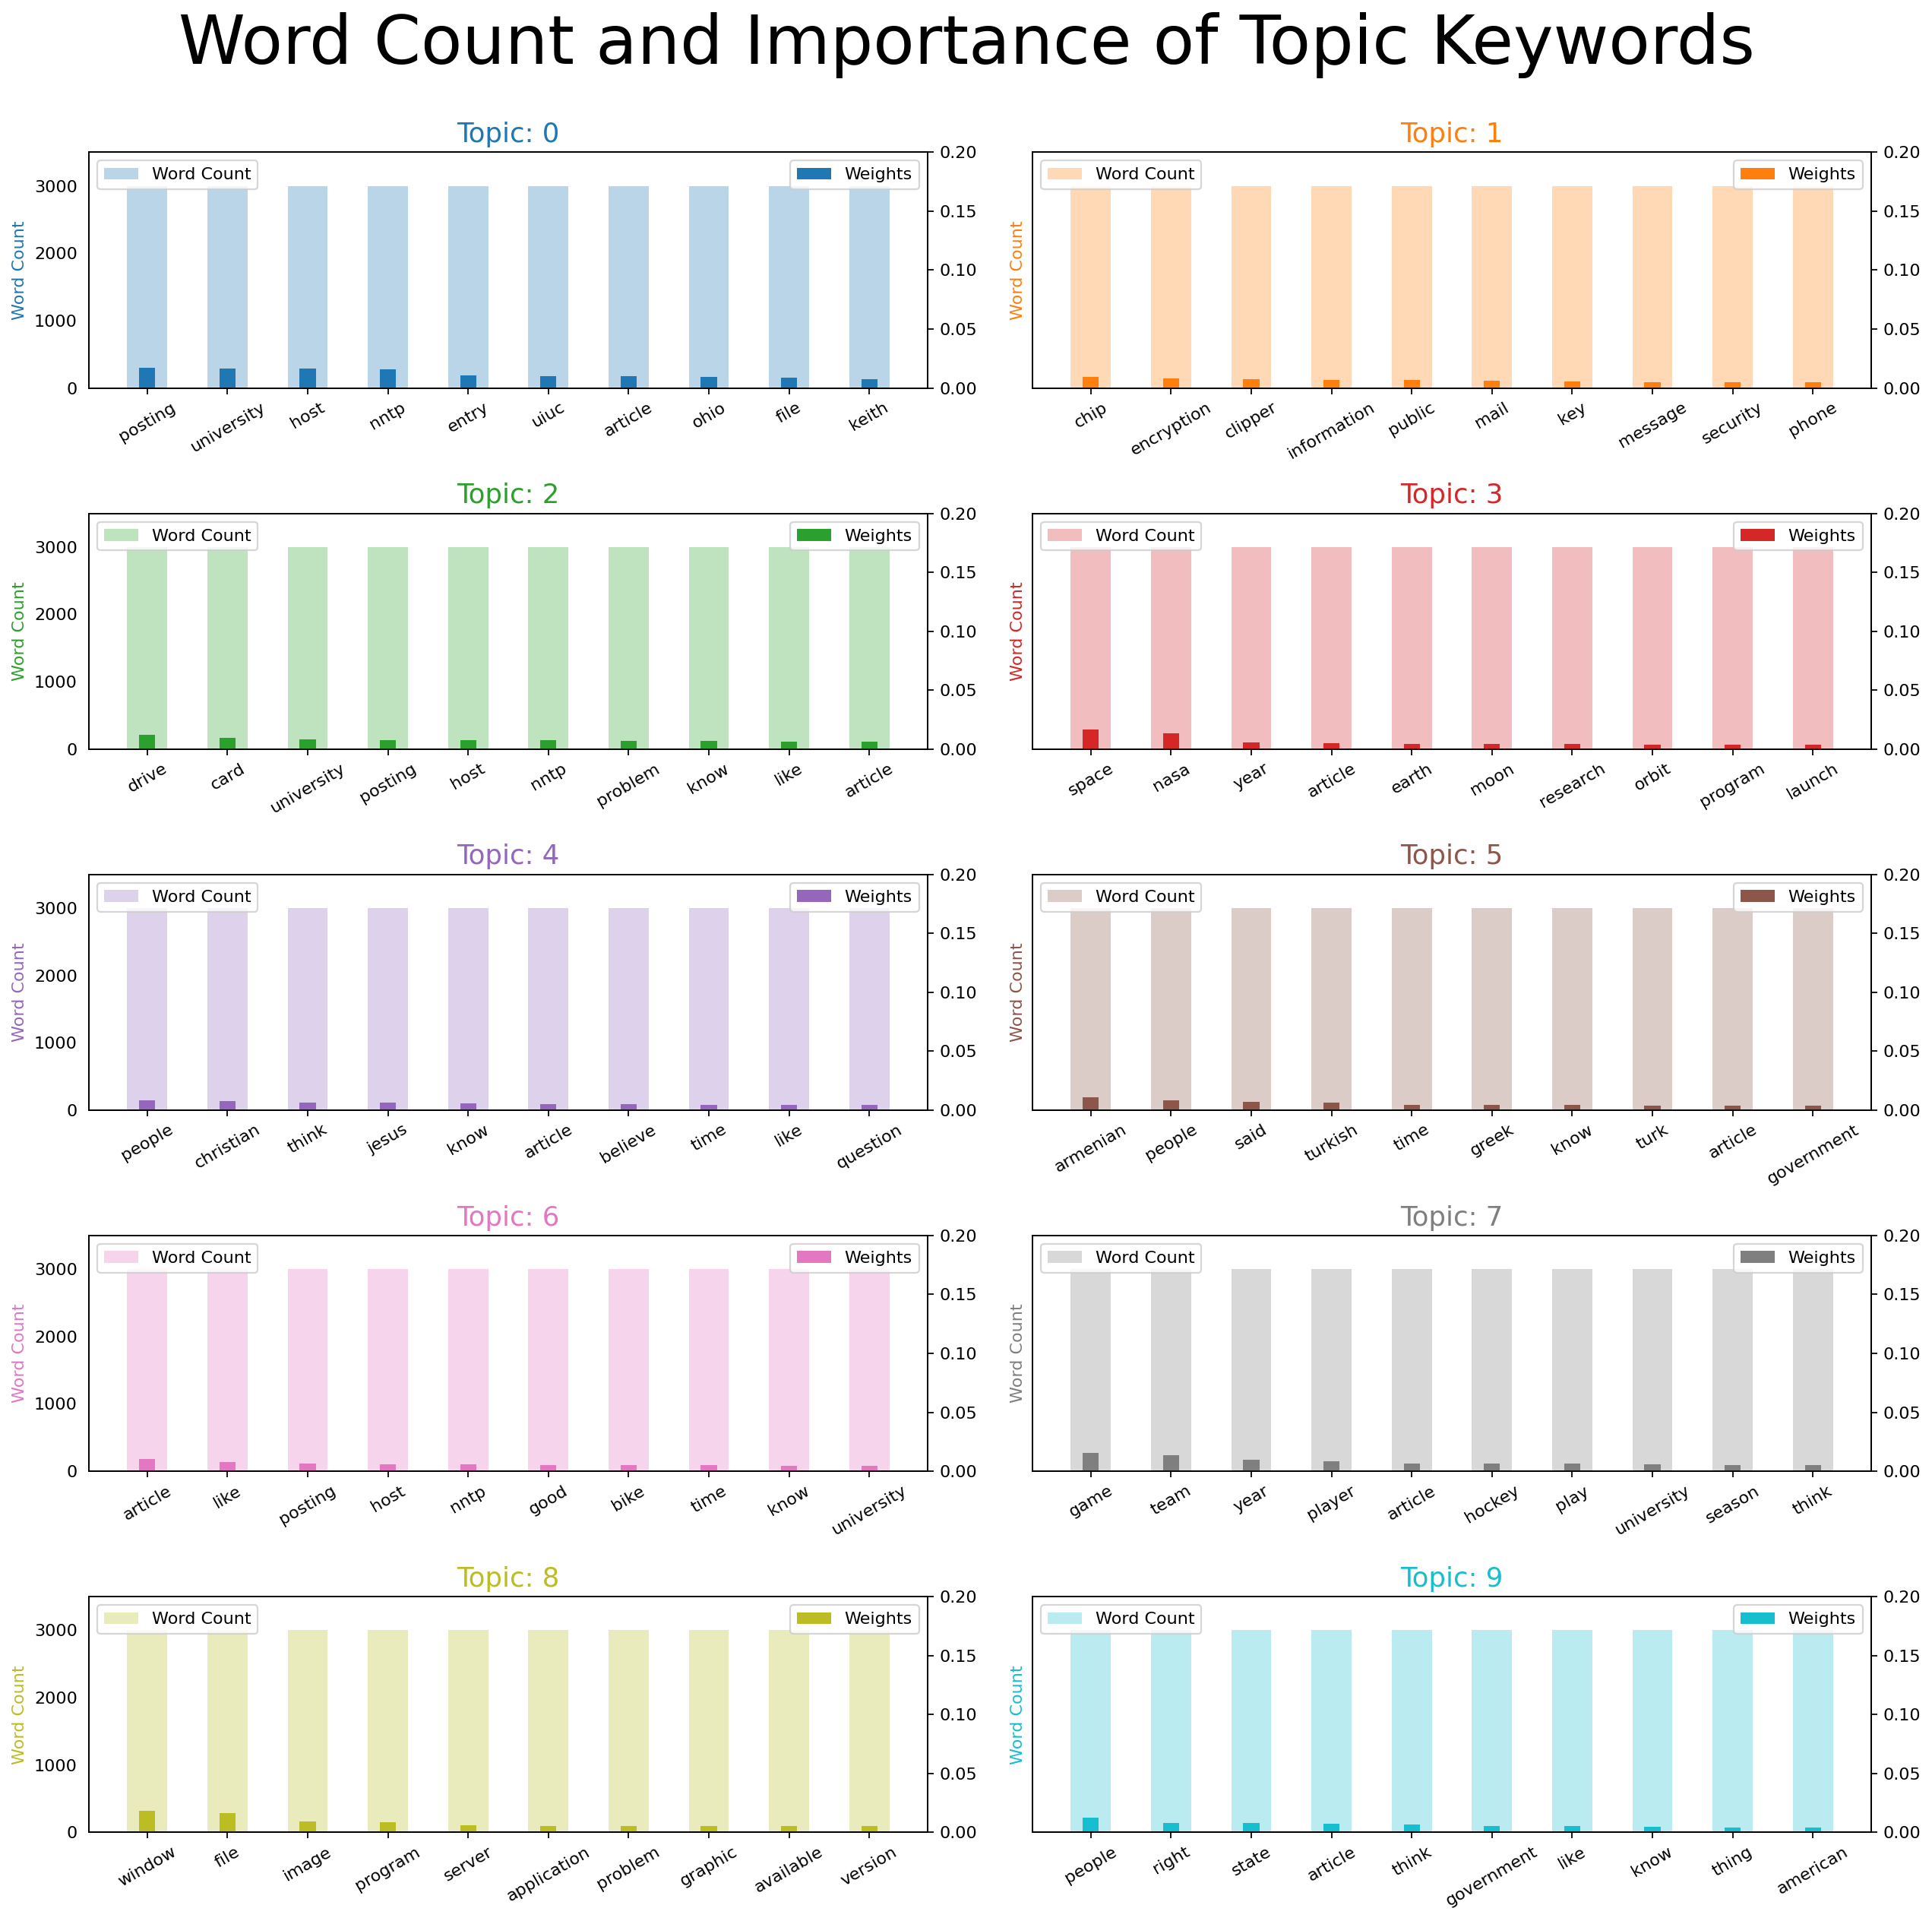

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter
%matplotlib inline
topics = lda_model.show_topics(formatted=False, num_topics = 10)
data_flat = [w for w_list in bow_corpus for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(16,15), sharey=True, dpi=160) #setting the number of topics visualised 
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height=3000, data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.2); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'center')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=40, y=1.05)    
plt.show()

### **Discussion**

Lets take a moment to discuss some of the topics generated! If we have a look at topic 7 we can see that the model has combined terms such as 'game', 'player', 'hockey','season'. Based on human judgment we can hypothesis that this news topic concerns the sports domain such as hockey. Another example is topic 4, it can be seen that it contains terms such as 'christian', 'believe', 'jesus' so it can be assumed that the news topic in this case concerns relegion. 

### **Step 5: Evaluation**

The unsupervised nature of topic models makes the model selection problematic; therefore, evaluation is an important issue. Topic coherence is a part of the larger subject of what are good topics, what properties of a document collection make it more suitable for topic modeling, and how can
topic modeling’s potential be utilized for human benefit ([Newman et al., 2010](https://aclanthology.org/N10-1012.pdf)). This
evaluation method can be defined as the degree of significance between the words inside a topic in terms of how interpretable it is. The goal of the topic coherence metrics
employed in this study is to assess the quality of topics from a human-like standpoint.


*   **C_v**: this measure ‘is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity’ ([Mifrah and Benlahmar, 2020](https://www.researchgate.net/publication/344238129_Topic_Modeling_Coherence_A_Comparative_Study_between_LDA_and_NMF_Models_using_COVID%2719_Corpus)).

*   **C-umass**: this measure takes into consideration the document co-occurrence
counts, one-preceding segmentation, and a logarithmic conditional probability as
a confirmation measure ([Mifrah and Benlahmar, 2020](https://www.researchgate.net/publication/344238129_Topic_Modeling_Coherence_A_Comparative_Study_between_LDA_and_NMF_Models_using_COVID%2719_Corpus)).

It is worth mentioning that the highest the score of the c v, the more coherent and
understandable a topic can be to a human. While in the case of c umass, the closer the
score is to 0, the better.

In [ ]:
# Compute Coherence Score using C_V
coherence_model_lda = CoherenceModel(model=lda_model, texts=preprocessed_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5626086935123448


In [ ]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=preprocessed_data, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -1.921655256775838


### **Discussion**

Even though LDA is considered as a state-of-the-art topic detection technique there are some limitations that need to be taken into consideration before implementation.

**Limitations**

The first drawback of this generative model is that it **fails to cope with large vocabularies**. Based on previous research, executors had to limit the vocabulary used to fit and implement a good topic model. This can lead to consequences for the performance of the model. To restrict the vocabulary usually, the most and least frequent words are eliminated; this trimming may remove essential terms from the scope [(Dieng et al.,2020)](https://aclanthology.org/2020.tacl-1.29.pdf). Another significant limitation is that the core premise of LDA is that documents are considered a probabilistic mixture of latent topics, with each topic having a probability distribution over words, and each document is represented using a bag-of-words model (BOW). Based on this approach, topic models are adequate for learning hidden themes but **do not account for a document’s deeper semantic understanding**. The semantic representation of a word can be an essential element in this procedure. Finally,when the training data sequence is altered, LDA suffers from **‘order effects’** which means that different topics are generated. This is the case due to the different shuffling order of the training data during the clustering process. Any study with such order effects will have a systematic inaccuracy. This inaccuracy can lead to misleading results, such as erroneous subject descriptions. 


### **Closing Notes**

This notebook was aiming to introduce a topic modeling task and highlight the importance of retrieving hidden topics within a great amount of text data. Moreover, to show the value of an NLP task such as topic modeling, this automatic topic retrieval can provide a company with information about the most frequent matters that the customers talk about and improve a company’s strategy and assist in developing marketing platforms.